In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread('kochi-style.jpg')
img2 = cv2.imread('kochi-style-removebg')

In [3]:
img = cv2.resize(img, (2048//2, 2048//2))

In [34]:
def padimg(img, x=4):
    i = img[x:-x,x:-x,:]
    i = np.pad(i, ((x, x), (x, x), (0, 0)), 'constant', constant_values=255)
    return i

In [28]:
ip = padimg(img)
ip2 = padimg_c(img)

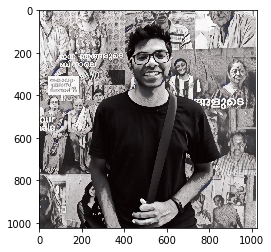

In [29]:
plt.imshow(ip)

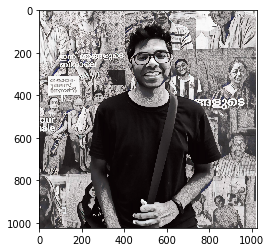

In [30]:
plt.imshow(ip2)

In [10]:
def frackteller(img):
    
    one = recursiveFunc(img, 5)
    two = np.rot90(one)
    three = np.rot90(two)
    four = np.rot90(three)
    
    final = np.hstack([np.vstack([two, three]), np.vstack([one, four])])
    return final

In [11]:
def recursiveFunc(img, n):
    if n == 1:
        topright = 255 * np.ones(img.shape).astype(np.uint8)
        img_p = padimg(img)
        final = np.hstack([np.vstack([topright, img_p]), np.vstack([topright, topright])])
        return final
    else:
        imghalf = cv2.resize(img, None, fx=0.5,fy=0.5)
        top = recursiveFunc(imghalf, n-1)
        right = recursiveFunc(imghalf, n-1)
        topright = 255 * np.ones(img.shape).astype(np.uint8)
                           
        top_p = padimg(top)
        right_p = padimg(right)
        img_p = padimg(img)
        
        final = np.hstack([np.vstack([top_p, img_p]), np.vstack([topright, right_p])])
        return final

In [ ]:
xx.shape

In [35]:
zz = frackteller(img)

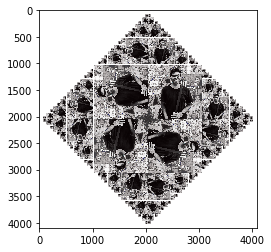

In [22]:
plt.imshow(zz)

In [36]:
cv2.imwrite('out.png',zz)

True

In [ ]:
img.shape